In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
fil = files.upload()

In [2]:
resume_df = pd.read_csv('Cleaned_Resumes.csv')

In [3]:
resume_df.head()

,Category,Resume_Details
0,Peoplesoft resumes,anubhav kumar singh to work in a globally comp...
1,Peoplesoft resumes,profile summary 7 years of experience in imple...
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,murali experience summary i have 6 years of ex...
4,Peoplesoft resumes,priyanka ramadoss 61 46 mountpleasant coonoor ...


In [4]:
resume_df.shape

(79, 2)

In [5]:
print(resume_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        79 non-null     object
 1   Resume_Details  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB
None


In [6]:
print(resume_df.describe())

               Category                                     Resume_Details
count                79                                                 79
unique                4                                                 76
top     React Developer  profile summary 7 years of experience in imple...
freq                 23                                                  2


In [7]:
resume_df.dtypes

Category          object
Resume_Details    object
dtype: object

In [8]:
resume_df.isnull().sum()

Category          0
Resume_Details    0
dtype: int64

In [9]:
resume_df = resume_df.dropna()

In [10]:
def extract_skills(resume_text):
    skills_pattern = r'\b(python|java|c\+\+|javascript|react|angular|node\.js|sql|peoplesoft|oracle|workday|hcm|fcm)\b'
    skills = re.findall(skills_pattern, resume_text, re.IGNORECASE)
    return set(skills)

def extract_years_of_experience(resume_text):
    # Define regex pattern to match years of experience
    pattern = r'\b(\d+)\s*(?:year[s]?\b|YR[s]?\b)'

    # Search for the pattern in the resume text
    matches = re.findall(pattern, resume_text, re.IGNORECASE)

    # Calculate the total years of experience
    total_years = sum(int(match) for match in matches)

    if total_years:
        return total_years
    else:
        return None

In [11]:
resume_df['Skills'] = resume_df['Resume_Details'].apply(extract_skills)
resume_df['Exp'] = resume_df['Resume_Details'].apply(extract_years_of_experience)

In [12]:
resume_df['Skills']

0           {oracle, hcm, peoplesoft}
1     {oracle, java, hcm, peoplesoft}
2      {sql, oracle, peoplesoft, hcm}
3           {oracle, hcm, peoplesoft}
4                        {peoplesoft}
                   ...               
74                     {workday, hcm}
75                     {workday, hcm}
76    {workday, fcm, hcm, peoplesoft}
77         {workday, hcm, peoplesoft}
78         {workday, hcm, peoplesoft}
Name: Skills, Length: 79, dtype: object

In [13]:
resume_df['Exp']

0      NaN
1      7.0
2      4.0
3      6.0
4     11.0
      ... 
74     8.0
75    11.0
76     6.0
77     6.0
78     2.0
Name: Exp, Length: 79, dtype: float64

In [14]:
resume_df['Exp'].max(),resume_df['Exp'].min()

(102.0, 1.0)

In [15]:
resume_df = resume_df[(resume_df['Exp'] <= 50)]

In [16]:
 # Print top 10 most frequent words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(resume_df['Resume_Details'])
sum_words = word_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
print(words_freq[:10])


[('experience', 554), ('peoplesoft', 428), ('application', 378), ('workday', 357), ('using', 355), ('server', 335), ('data', 316), ('reports', 308), ('project', 282), ('business', 255)]


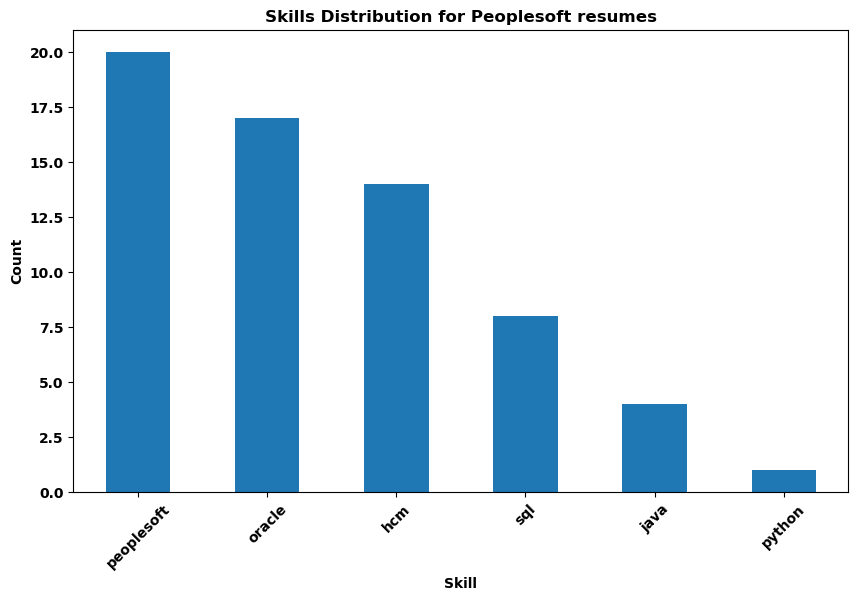

In [17]:
skills = [skill for resume_skills in resume_df[resume_df['Category'] == 'Peoplesoft resumes']['Skills'] for skill in resume_skills]
skill_counts = pd.Series(skills).value_counts()
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title(f'Skills Distribution for Peoplesoft resumes')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

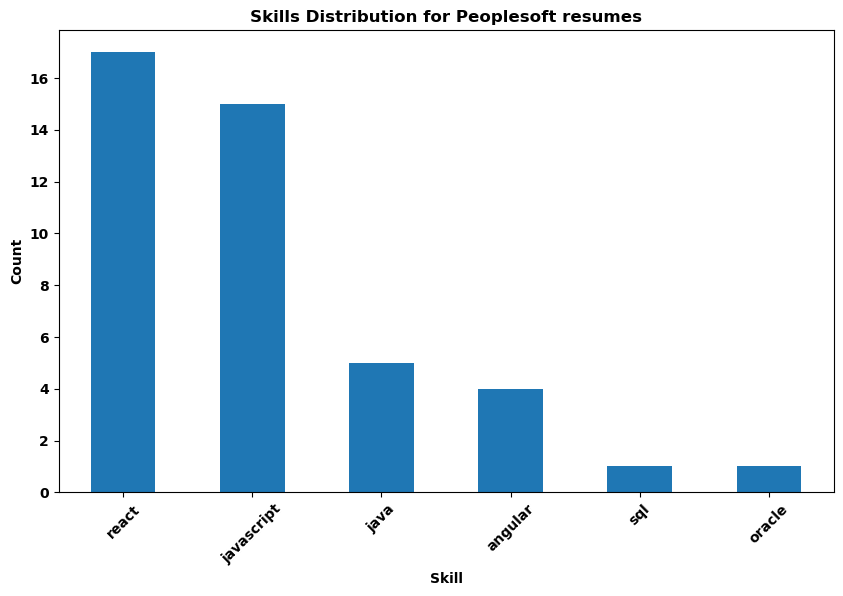

In [18]:
skills = [skill for resume_skills in resume_df[resume_df['Category'] == 'React Developer']['Skills'] for skill in resume_skills]
skill_counts = pd.Series(skills).value_counts()
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title(f'Skills Distribution for Peoplesoft resumes')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

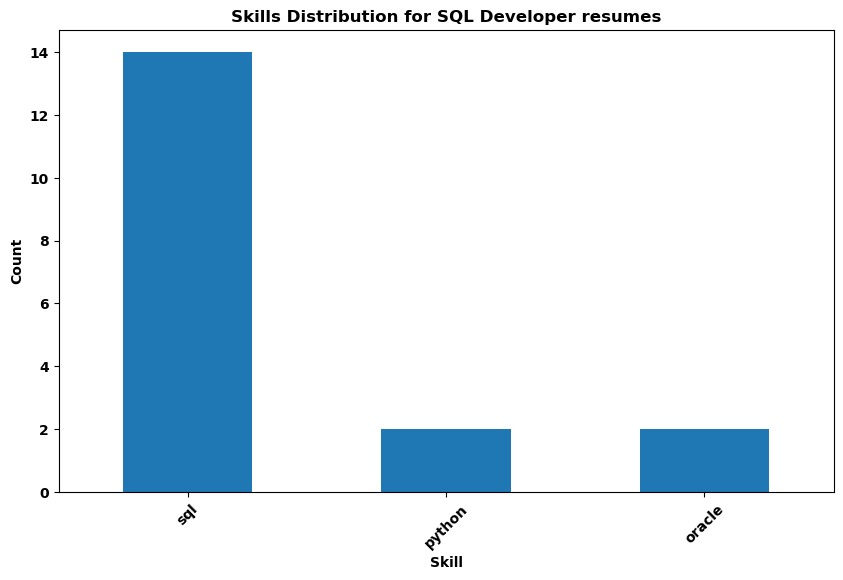

In [19]:
skills = [skill for resume_skills in resume_df[resume_df['Category'] == 'SQL Developer']['Skills'] for skill in resume_skills]
skill_counts = pd.Series(skills).value_counts()
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title(f'Skills Distribution for SQL Developer resumes')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

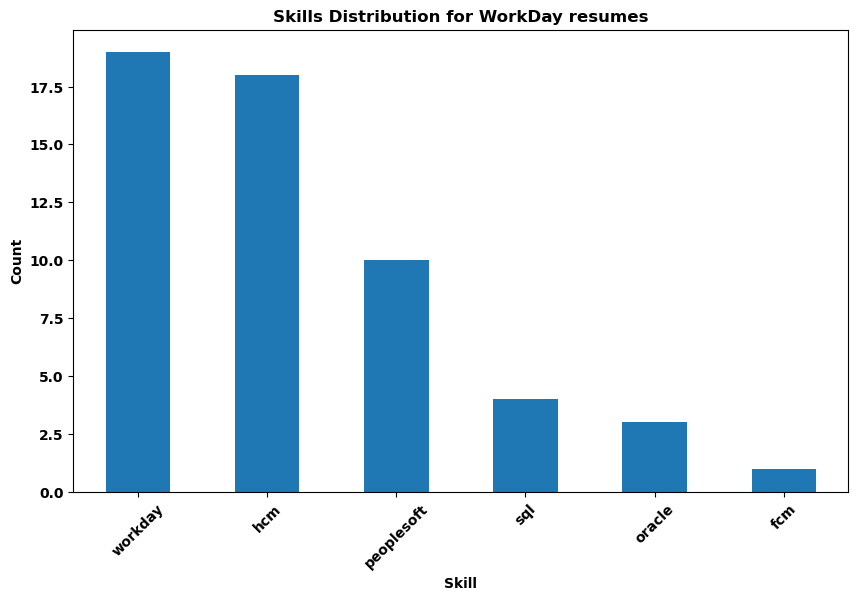

In [20]:
skills = [skill for resume_skills in resume_df[resume_df['Category'] == 'WorkDay']['Skills'] for skill in resume_skills]
skill_counts = pd.Series(skills).value_counts()
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title(f'Skills Distribution for WorkDay resumes')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
def extract_education_level(resume_text):
    education_pattern = r"\b(bachelor|master|phd|doctorate|diploma|associate|certification|" \
                      r"professional certificate|(b\.?tech|m\.?tech|b tech|b\.e|b\. tech|b-tech|" \
                      r"mtech|mca|m\.c\.a|mba|bs|b\.c\.a|bca|b c a|b\.s|b\.a|ba|ms|msc|bsc|" \
                      r"associates degree|community college))(?:\s*\(.*\))?\b"
    match = re.search(education_pattern, resume_text, re.IGNORECASE)
    if match:
        return match.group(1).upper()
    return 'Unknown'

In [22]:
resume_df['Education_Level'] = resume_df['Resume_Details'].apply(extract_education_level)
resume_df['Education_Level'].value_counts()

Education_Level
B TECH       16
Unknown      15
BACHELOR     13
MS            9
MASTER        4
ASSOCIATE     3
MBA           3
MCA           2
BSC           2
BCA           1
BTECH         1
BA            1
B C A         1
Name: count, dtype: int64

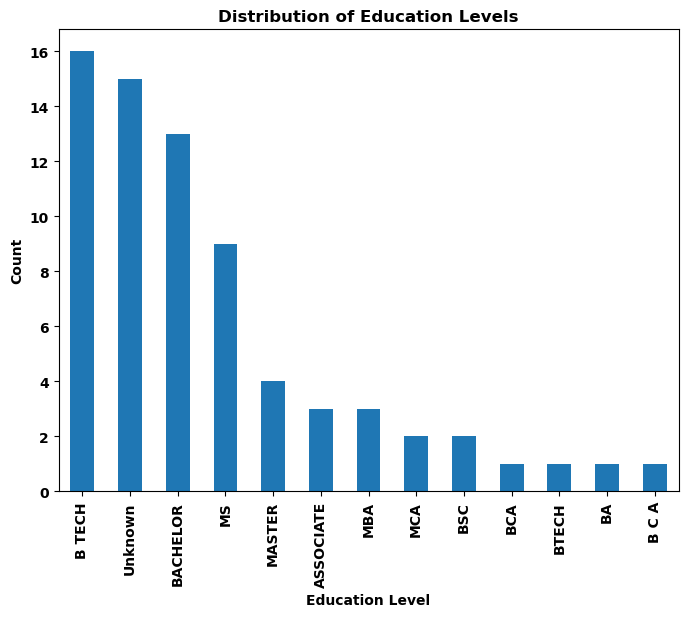

In [23]:
education_level_counts = resume_df['Education_Level'].value_counts()
plt.figure(figsize=(8, 6))
education_level_counts.plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

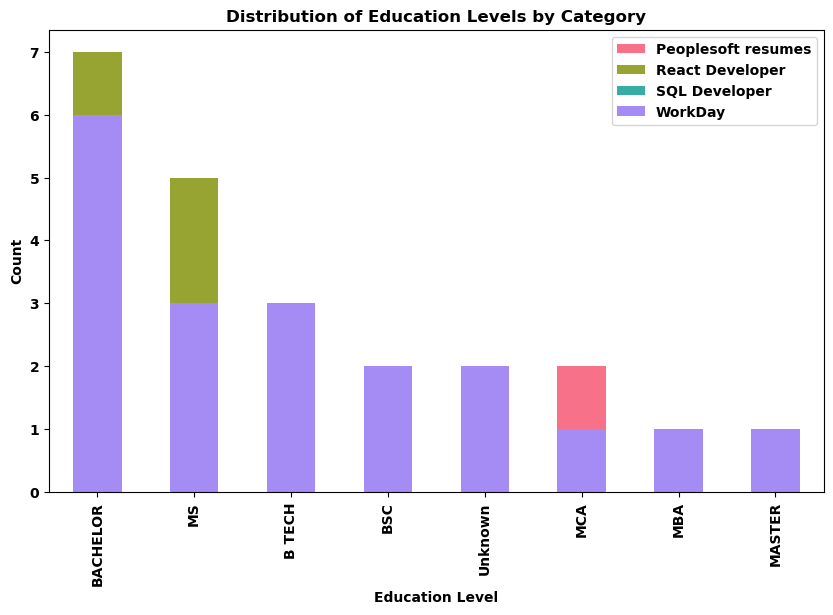

In [24]:
# Define a custom color palette
palette = sns.color_palette("husl", n_colors=len(resume_df['Category'].unique()))

# Create a dictionary to map categories to colors
category_colors = dict(zip(resume_df['Category'].unique(), palette))


plt.figure(figsize=(10, 6))
grouped_data = resume_df.groupby('Category')['Education_Level']

for i, (category, group) in enumerate(grouped_data):
    education_level_counts = group.value_counts()
    education_level_counts.plot(kind='bar', label=category, color=category_colors[category])

plt.title('Distribution of Education Levels by Category')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend()
plt.show()

In [25]:
def extract_years_of_experience(resume_text):
    # Define regex pattern to match years of experience
    pattern = r'\b(\d+)\s*(?:year[s]?\b|YR[s]?\b)'

    # Search for the pattern in the resume text
    matches = re.findall(pattern, resume_text, re.IGNORECASE)

    # Calculate the total years of experience
    total_years = sum(int(match) for match in matches)

    if total_years:
        return total_years
    else:
        return 0

In [26]:
resume_df['Exp'] = resume_df['Resume_Details'].apply(extract_years_of_experience)

In [27]:
resume_df['Exp']

1      7
2      4
3      6
4     11
5      8
      ..
74     8
75    11
76     6
77     6
78     2
Name: Exp, Length: 71, dtype: int64

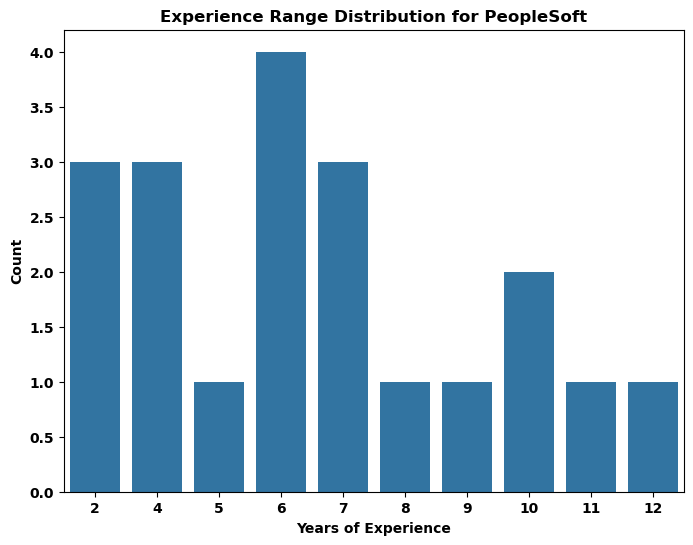

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resume_df[resume_df['Category'] == 'Peoplesoft resumes' ], x='Exp')
plt.title(f'Experience Range Distribution for PeopleSoft')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

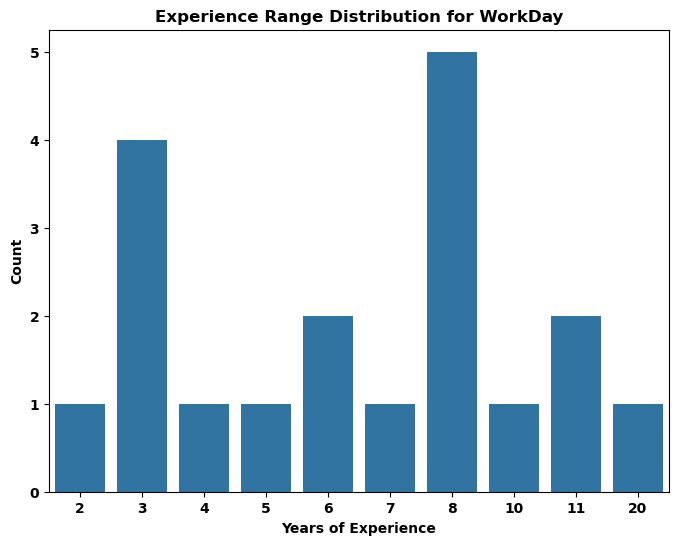

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resume_df[resume_df['Category'] == 'WorkDay' ], x='Exp')
plt.title(f'Experience Range Distribution for WorkDay')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

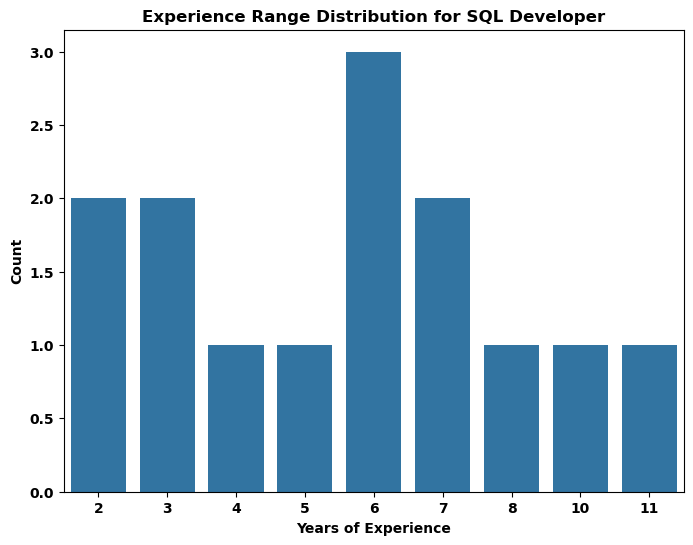

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resume_df[resume_df['Category'] == 'SQL Developer' ], x='Exp')
plt.title(f'Experience Range Distribution for SQL Developer')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

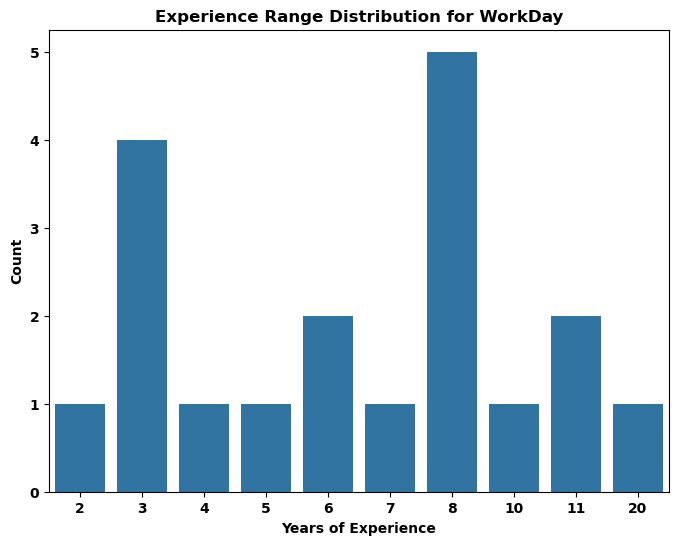

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resume_df[resume_df['Category'] == 'WorkDay' ], x='Exp')
plt.title(f'Experience Range Distribution for WorkDay')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

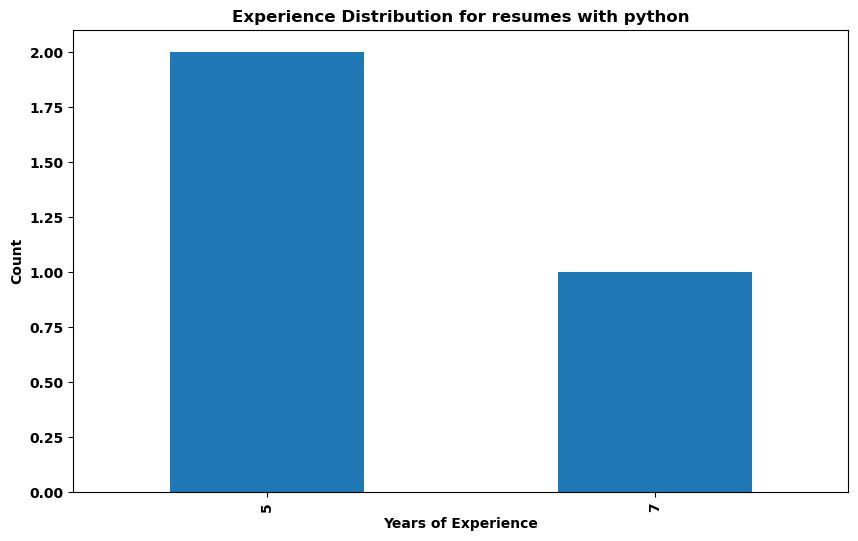

In [32]:
# Analyzing the relationship between skills and experience
def plot_skills_vs_experience(skill):
    exp_counts = resume_df[resume_df['Skills'].apply(lambda skills: skill in skills)]['Exp'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    exp_counts.plot(kind='bar')
    plt.title(f'Experience Distribution for resumes with {skill}')
    plt.xlabel('Years of Experience')
    plt.ylabel('Count')
    plt.show()

# Example: Plot experience distribution for a specific skill
plot_skills_vs_experience('python')

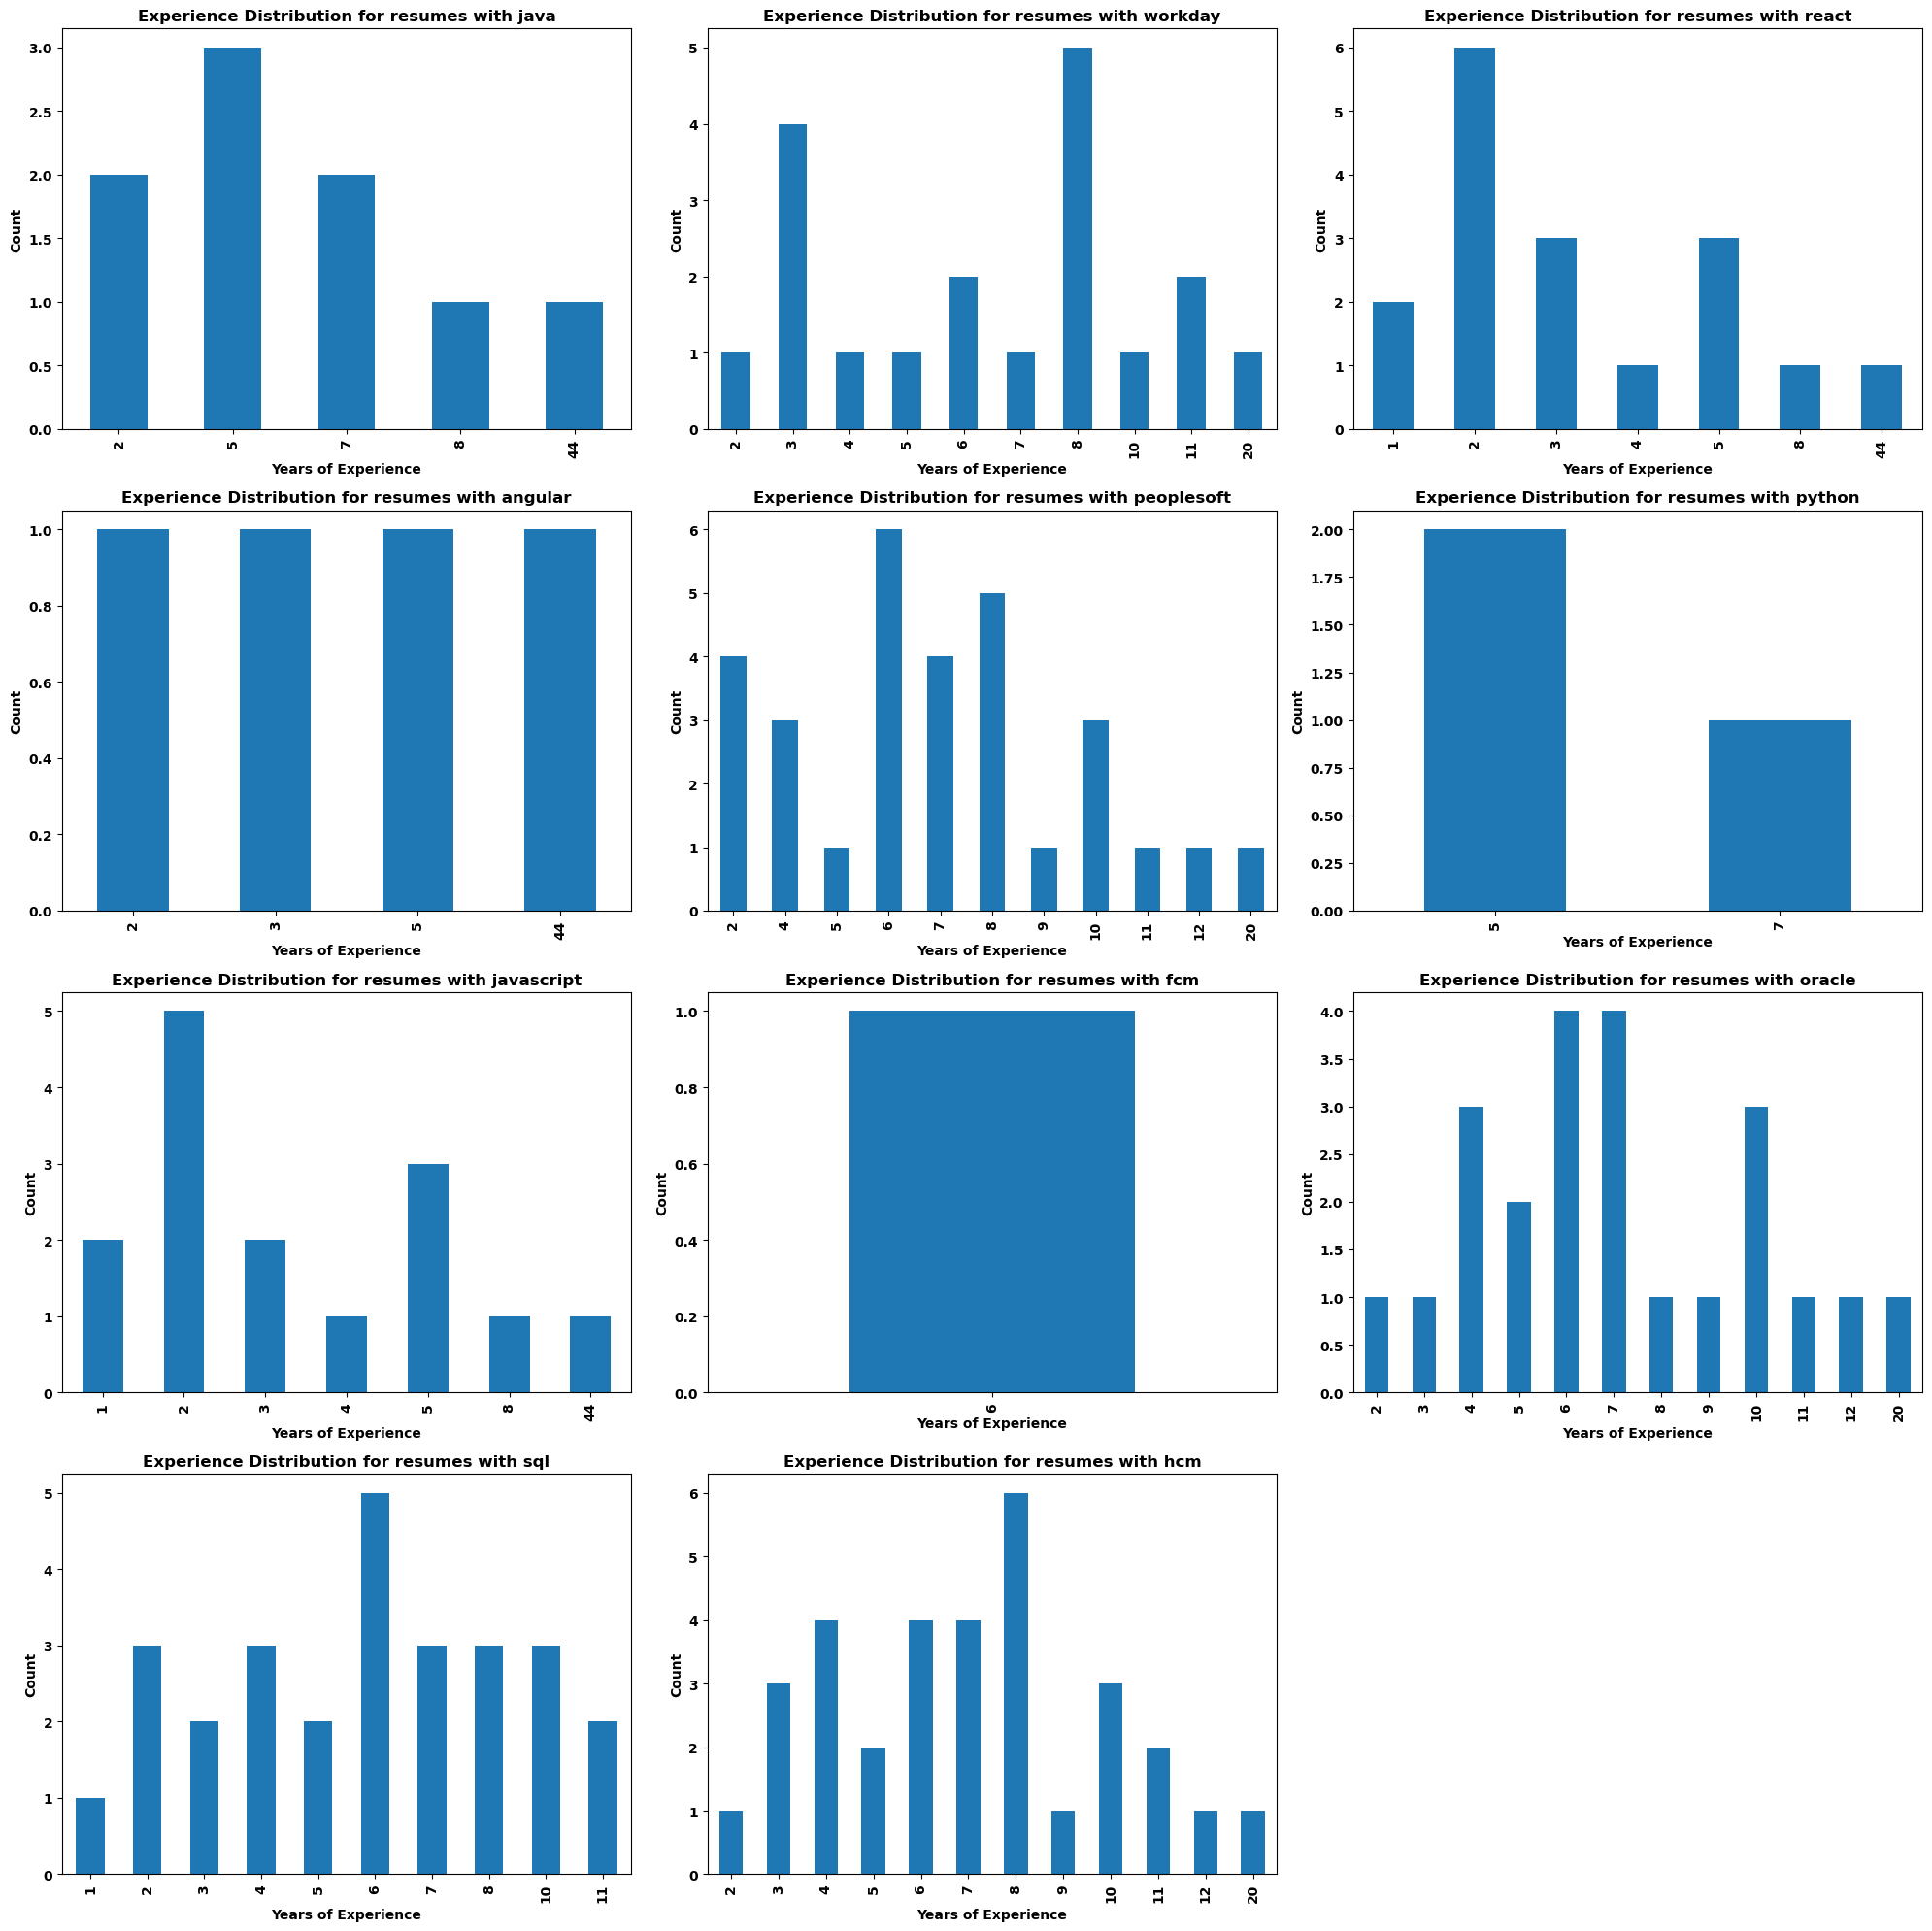

In [33]:
# Function to plot skills vs. experience for all unique skills in the dataset
def plot_all_skills_vs_experience(resume_df):
    unique_skills = set(skill for skills in resume_df['Skills'] for skill in skills)

    # Create subplots
    n_skills = len(unique_skills)
    n_cols = 3  # Number of columns for the subplots
    n_rows = (n_skills + n_cols - 1) // n_cols  # Number of rows for the subplots

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
    axes = axes.flatten()  # Flatten the axes array to easily iterate over it

    for idx, skill in enumerate(unique_skills):
        exp_counts = resume_df[resume_df['Skills'].apply(lambda skills: skill in skills)]['Exp'].value_counts().sort_index()
        ax = axes[idx]
        exp_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Experience Distribution for resumes with {skill}')
        ax.set_xlabel('Years of Experience')
        ax.set_ylabel('Count')

    # Remove any empty subplots
    for idx in range(len(unique_skills), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

# Example: Plot experience distribution for all skills
plot_all_skills_vs_experience(resume_df)

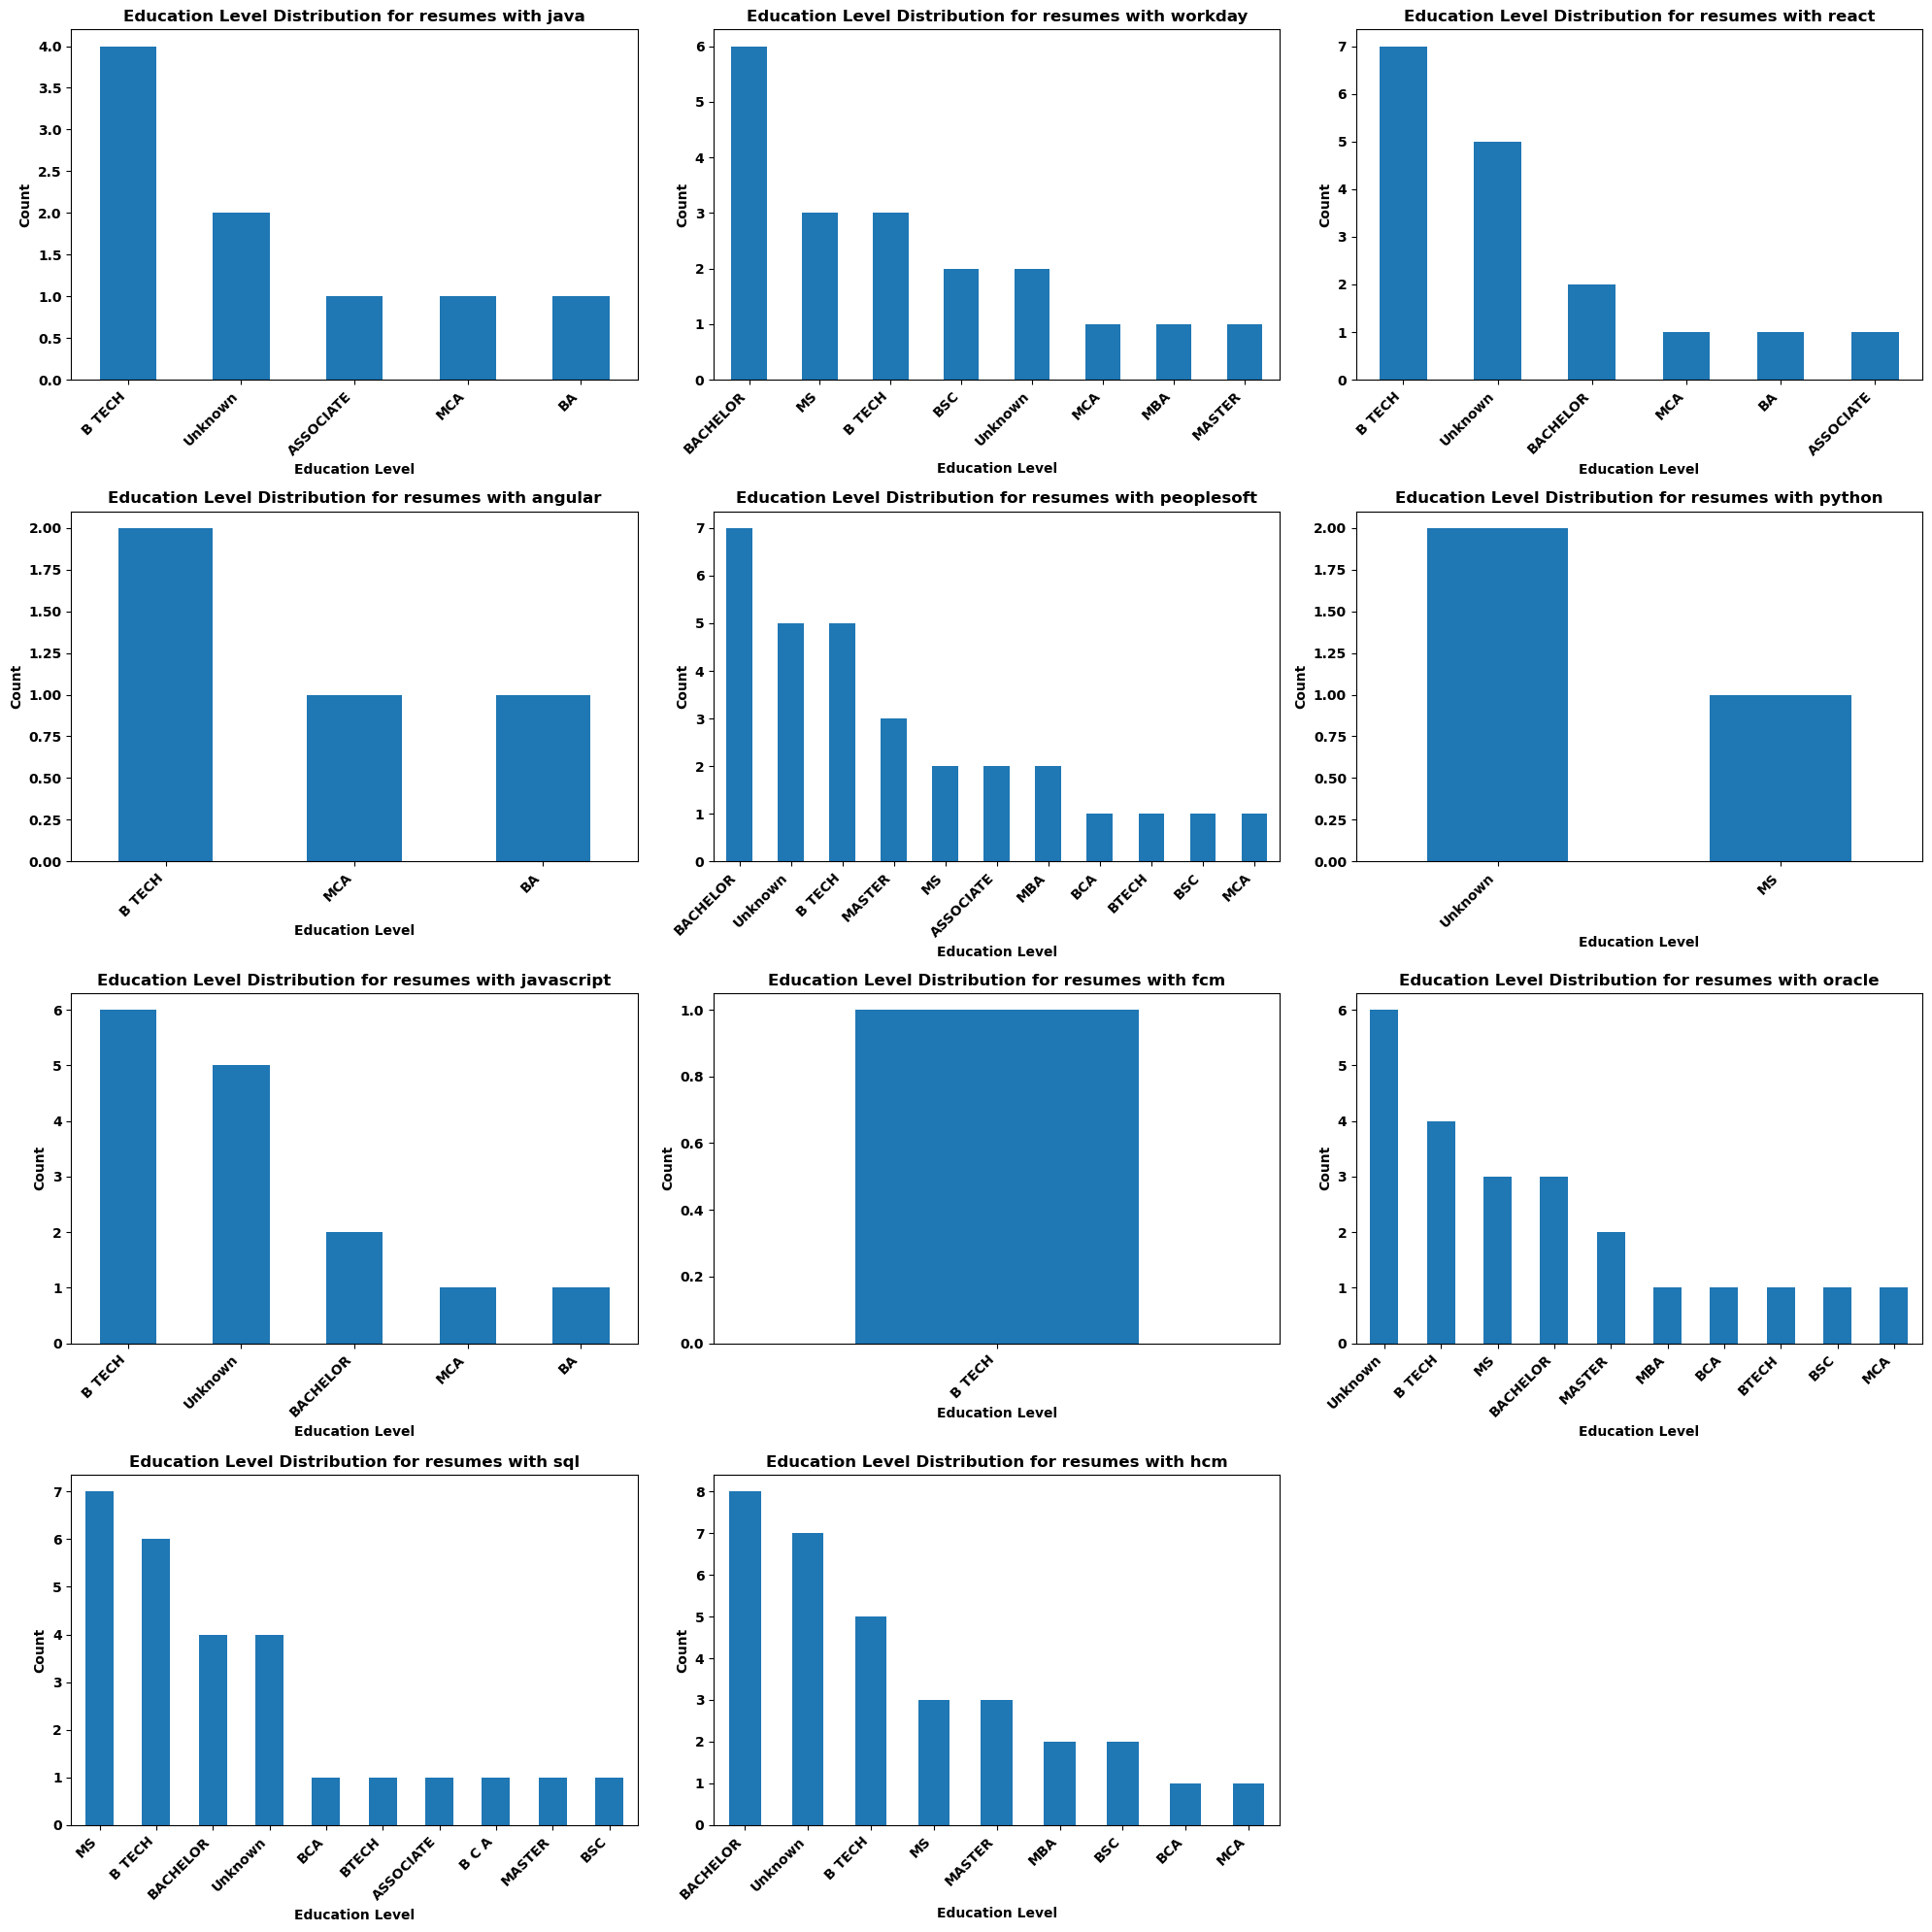

In [34]:
# Function to plot skills vs. education level for all unique skills in the dataset
def plot_all_skills_vs_education(resume_df):
    unique_skills = set(skill for skills in resume_df['Skills'] for skill in skills)

    # Create subplots
    n_skills = len(unique_skills)
    n_cols = 3  # Number of columns for the subplots
    n_rows = (n_skills + n_cols - 1) // n_cols  # Number of rows for the subplots

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
    axes = axes.flatten()  # Flatten the axes array to easily iterate over it

    for idx, skill in enumerate(unique_skills):
        edu_counts = resume_df[resume_df['Skills'].apply(lambda skills: skill in skills)]['Education_Level'].value_counts()
        ax = axes[idx]
        edu_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Education Level Distribution for resumes with {skill}')
        ax.set_xlabel('Education Level')
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Remove any empty subplots
    for idx in range(len(unique_skills), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

# Example: Plot education level distribution for all skills
plot_all_skills_vs_education(resume_df)


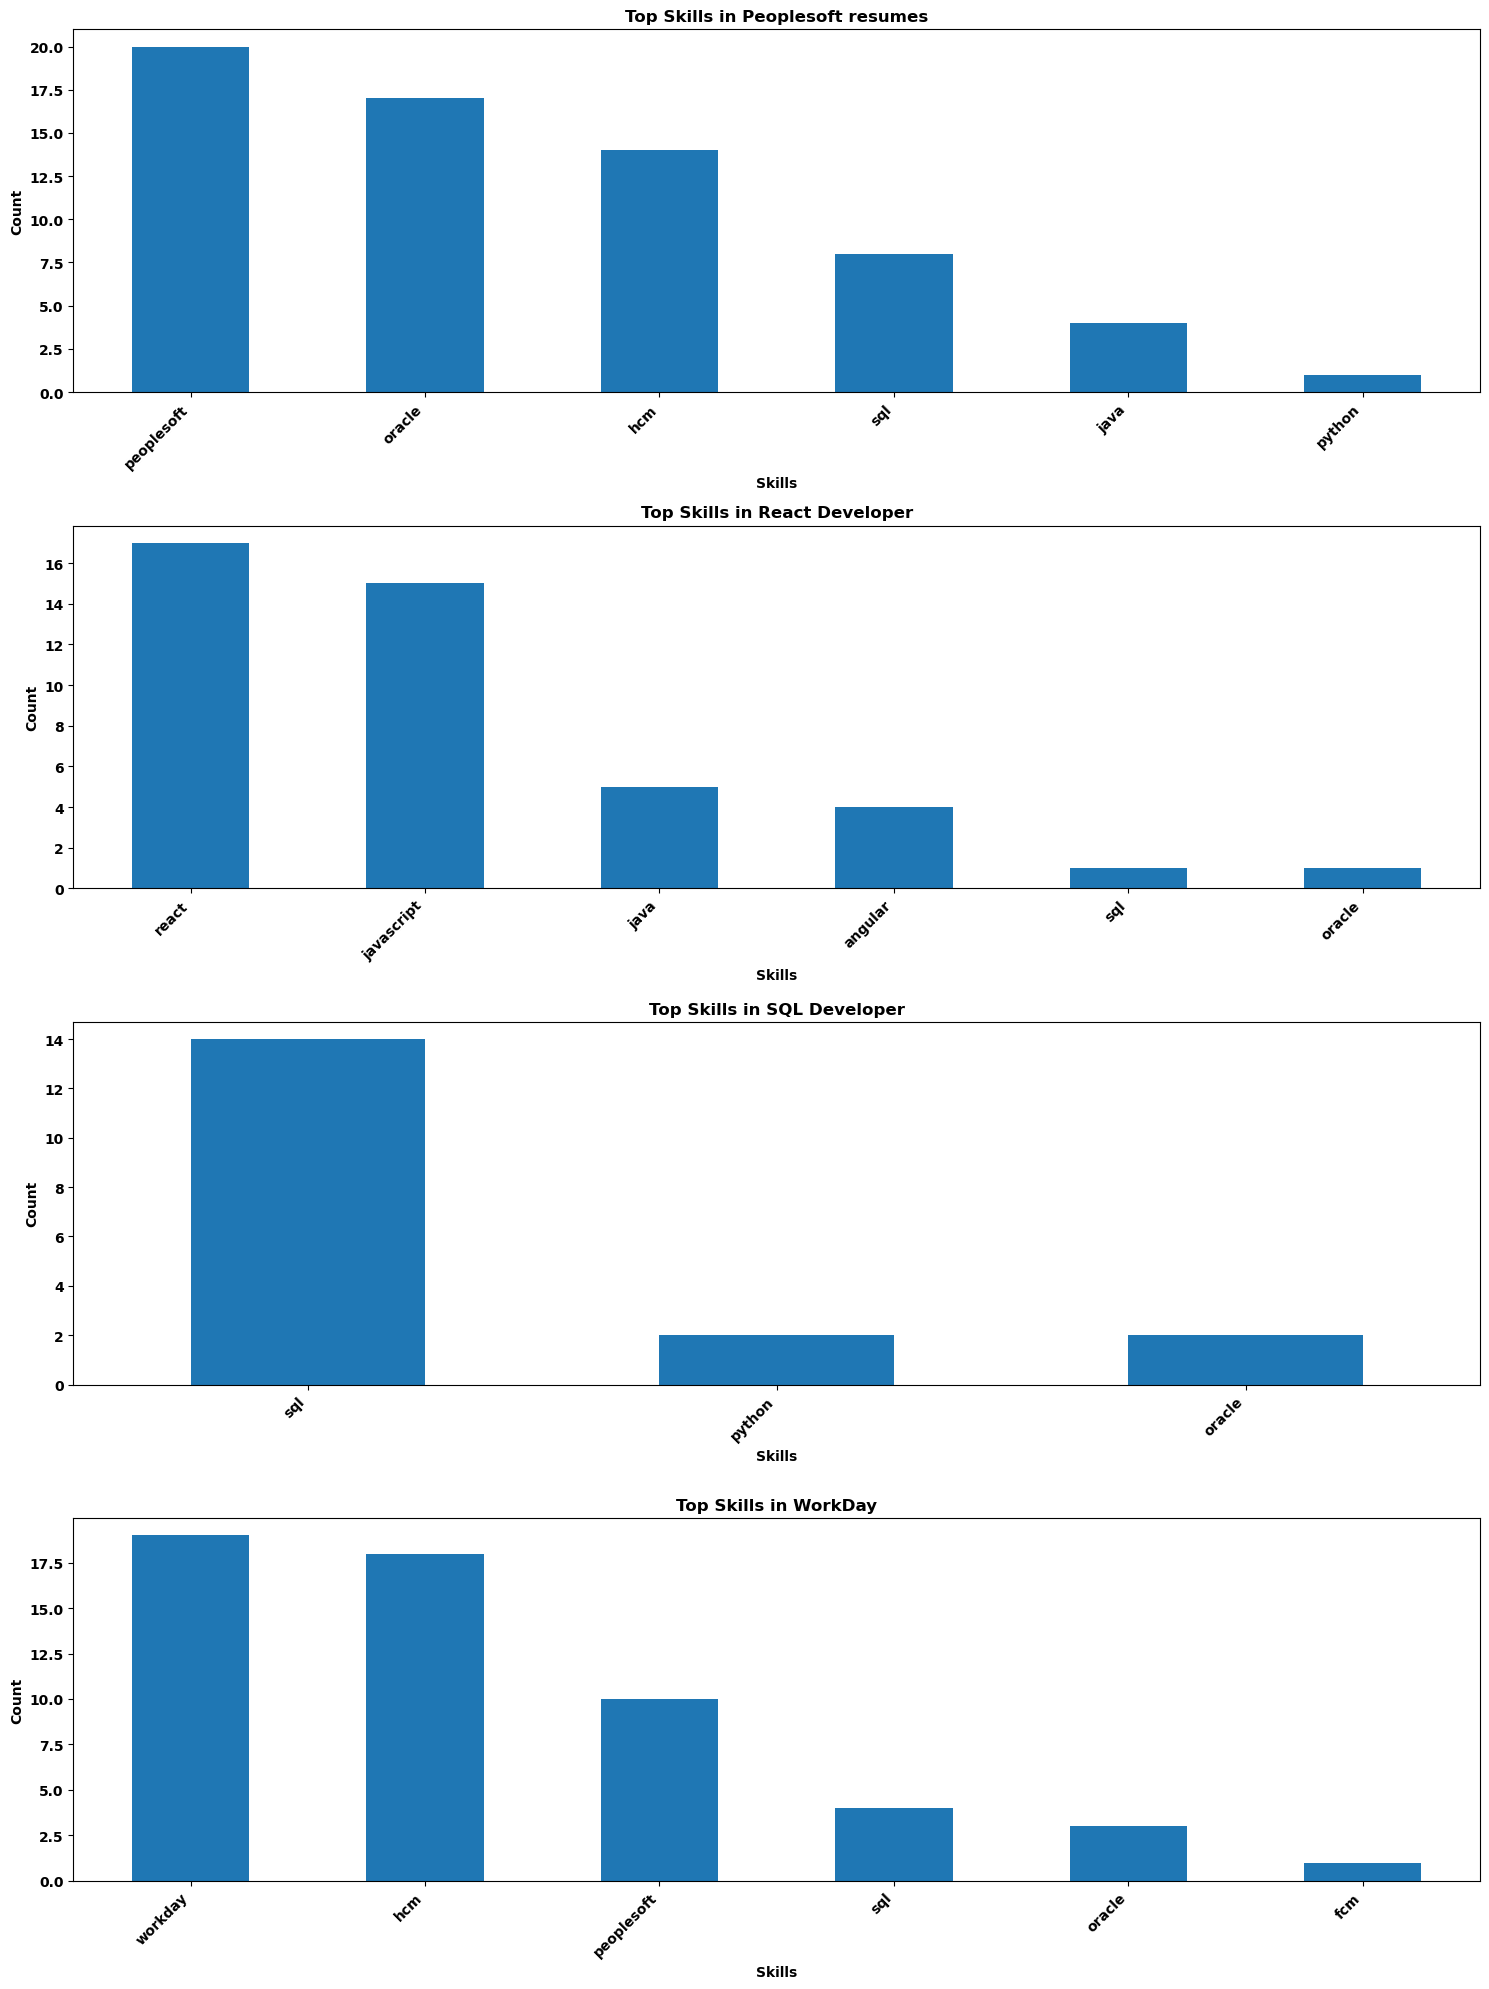

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot top skills by category
def plot_top_skills_by_category(resume_df, top_n=10):
    categories = resume_df['Category'].unique()

    fig, axes = plt.subplots(len(categories), 1, figsize=(15, 5 * len(categories)))

    for idx, category in enumerate(categories):
        skills = [skill for resume_skills in resume_df[resume_df['Category'] == category]['Skills'] for skill in resume_skills]
        skill_counts = pd.Series(skills).value_counts().head(top_n)
        ax = axes[idx] if len(categories) > 1 else axes
        skill_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Top Skills in {category}')
        ax.set_xlabel('Skills')
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Plotting top skills by category
plot_top_skills_by_category(resume_df)


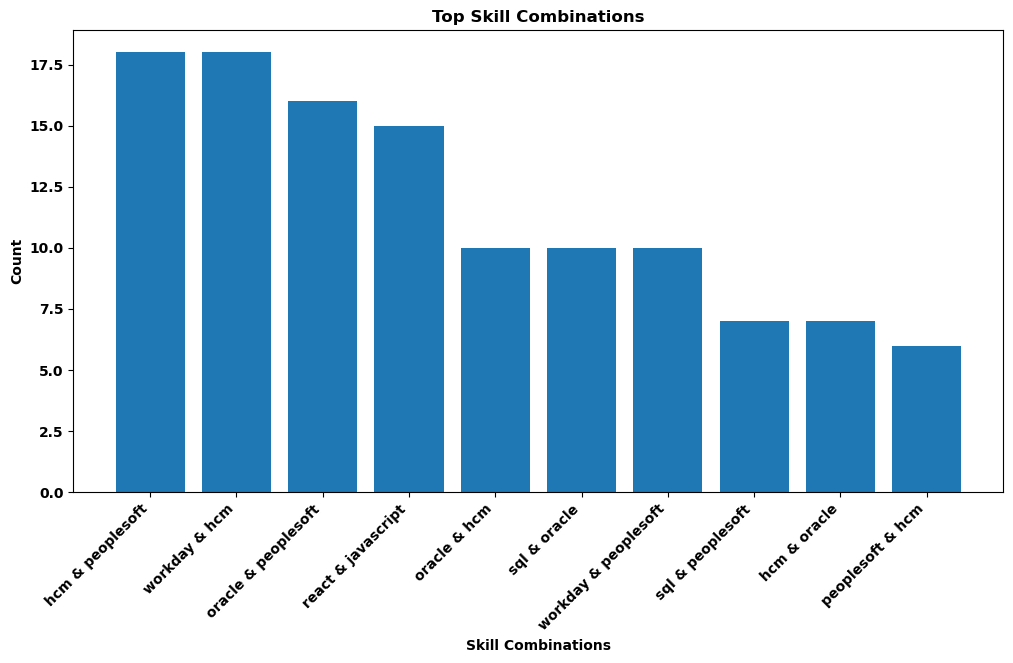

In [36]:
from itertools import combinations
from collections import Counter

# Function to analyze skill combinations
def plot_top_skill_combinations(resume_df, top_n=10):
    skill_combinations = []

    for skills in resume_df['Skills']:
        skill_combinations.extend(combinations(skills, 2))

    combo_counts = Counter(skill_combinations)
    top_combos = combo_counts.most_common(top_n)
    skills, counts = zip(*top_combos)

    skill_pairs = [f'{s1} & {s2}' for s1, s2 in skills]

    plt.figure(figsize=(12, 6))
    plt.bar(skill_pairs, counts)
    plt.title(f'Top Skill Combinations')
    plt.xlabel('Skill Combinations')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plotting top skill combinations
plot_top_skill_combinations(resume_df)


1. Data Overview:
 * The dataset included columns such as 'Category', 'Skills', and 'Exp'.
Initial inspection revealed the structure and types of data, helping us plan subsequent analysis steps.

2. Missing Data:

  * We identified and handled missing values to ensure the dataset was clean for analysis. This step is crucial for maintaining the integrity of the analysis results.
3. Category Distribution:

  * The analysis of the 'Category' column showed the distribution of resumes across different job roles or industries.
  * The bar plot revealed which categories were most and least represented in the dataset. This helps in understanding the focus areas of the dataset and potential biases.
3. Experience Distribution:

    * The histogram of the 'Exp' column illustrated the distribution of years of experience among candidates.
    * Summary statistics provided insights into the average, median, minimum, and maximum years of experience.
    * The experience range from 1 to 102 years was further analyzed by filtering to include only relevant data, providing a more focused view of the candidates' experience levels.
4. Skills Analysis:

    * The analysis of the 'Skills' column involved generating all possible pairs of skills to identify the most common skill combinations.
    * Using combinations and the Counter from the collections module, we identified the top 10 skill pairs.
    * The bar plot of these top skill combinations revealed which skill sets frequently appear together, offering valuable insights into common expertise areas among candidates.